Finance Data Project
Exploratory Data Analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [2]:
#Need to extract the data from Yahoo Finance 
# using library yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

Data
Stock data from Jan 1st 2006 to Jan 1st 2020.
Six banks.
6 columns and 3523 rows.
Source: Yahoo Finance.
We will get stock information for the following banks:

Bank of America (BAC)
CitiGroup (C)
Goldman Sachs (GS)
JPMorgan Chase (JPM)
Morgan Stanley (MS)
Wells Fargo (WFC)


In [34]:
#read the data from yahoo finance
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = yf.download(tickers, start='2006-01-01', end='2016-01-01')

[*********************100%***********************]  6 of 6 completed


In [4]:
bank_stocks.head()

Price           Close                                                          \
Ticker            BAC           C         GS        JPM         MS        WFC   
Date                                                                            
2006-01-03  31.370413  324.013153  95.765617  24.241714  32.190918  18.778116   
2006-01-04  31.037243  318.031128  94.442871  24.101812  32.212994  18.560308   
2006-01-05  31.077209  319.608826  94.405724  24.174791  32.301334  18.539703   
2006-01-06  31.030577  319.608826  95.743340  24.345137  32.334446  18.648609   
2006-01-09  31.050562  318.096832  96.895157  24.740536  32.676731  18.645666   

Price            High                                    ...       Open  \
Ticker            BAC           C         GS        JPM  ...         GS   
Date                                                     ...              
2006-01-03  31.437044  324.604774  96.189200  24.344256  ...  94.153053   
2006-01-04  31.477015  322.764133  95.795351  24.418141  ...  94.636083   
2006-01-05  31.203812  320.660587  94.613796  24.217374  ...  93.632880   
2006-01-06  31.257126  321.449428  96.048021  24.478969  ...  94.591510   
2006-01-09  31.297103  320.397595  97.066071  24.770954  ...  95.490664   

Price                                          Volume                    \
Ticker            JPM         MS        WFC       BAC        C       GS   
Date                                                                      
2006-01-03  24.024572  31.561562  18.601520  16296700  1537600  6188700   
2006-01-04  24.199144  32.406218  18.719245  17757900  1870960  4861600   
2006-01-05  24.095709  32.323417  18.542646  14970700  1143160  3717400   
2006-01-06  24.284303  32.444859  18.589743  12599800  1370210  4319600   
2006-01-09  24.259962  32.367576  18.645666  15619400  1680740  4723500   

Price                                    
Ticker           JPM       MS       WFC  
Date                                     
2006-01-03  12838600  5377000  11016400  
2006-01-04  13491500  7977800  10870000  
2006-01-05   8109400  5778000  10158000  
2006-01-06   7966900  6889800   8403800  
2006-01-09  16575200  4144500   5619600  

[5 rows x 30 columns]

In [8]:
#max close price of each stock throughout the time period
bank_stocks['Close'].max()

Ticker
BAC     37.937481
C      386.292694
GS     186.998825
JPM     53.933903
MS      50.462818
WFC     44.268089
dtype: float64

In [35]:
#Create a new empty DataFrame called returns. This dataframe will 
# contain the returns for each bank's stock.
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks['Close'][tick].pct_change()
returns = returns[1:]#remove the first row which is NaN
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-04,-0.010621,-0.018462,-0.013812,-0.005771,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002743,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000645,-0.004730,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001476,0.000507,-0.000789


In [36]:
#Convert the date to a datetime object
returns.index = pd.to_datetime(returns.index)


/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/shaarifakhtar/Documents/python/anaconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` 

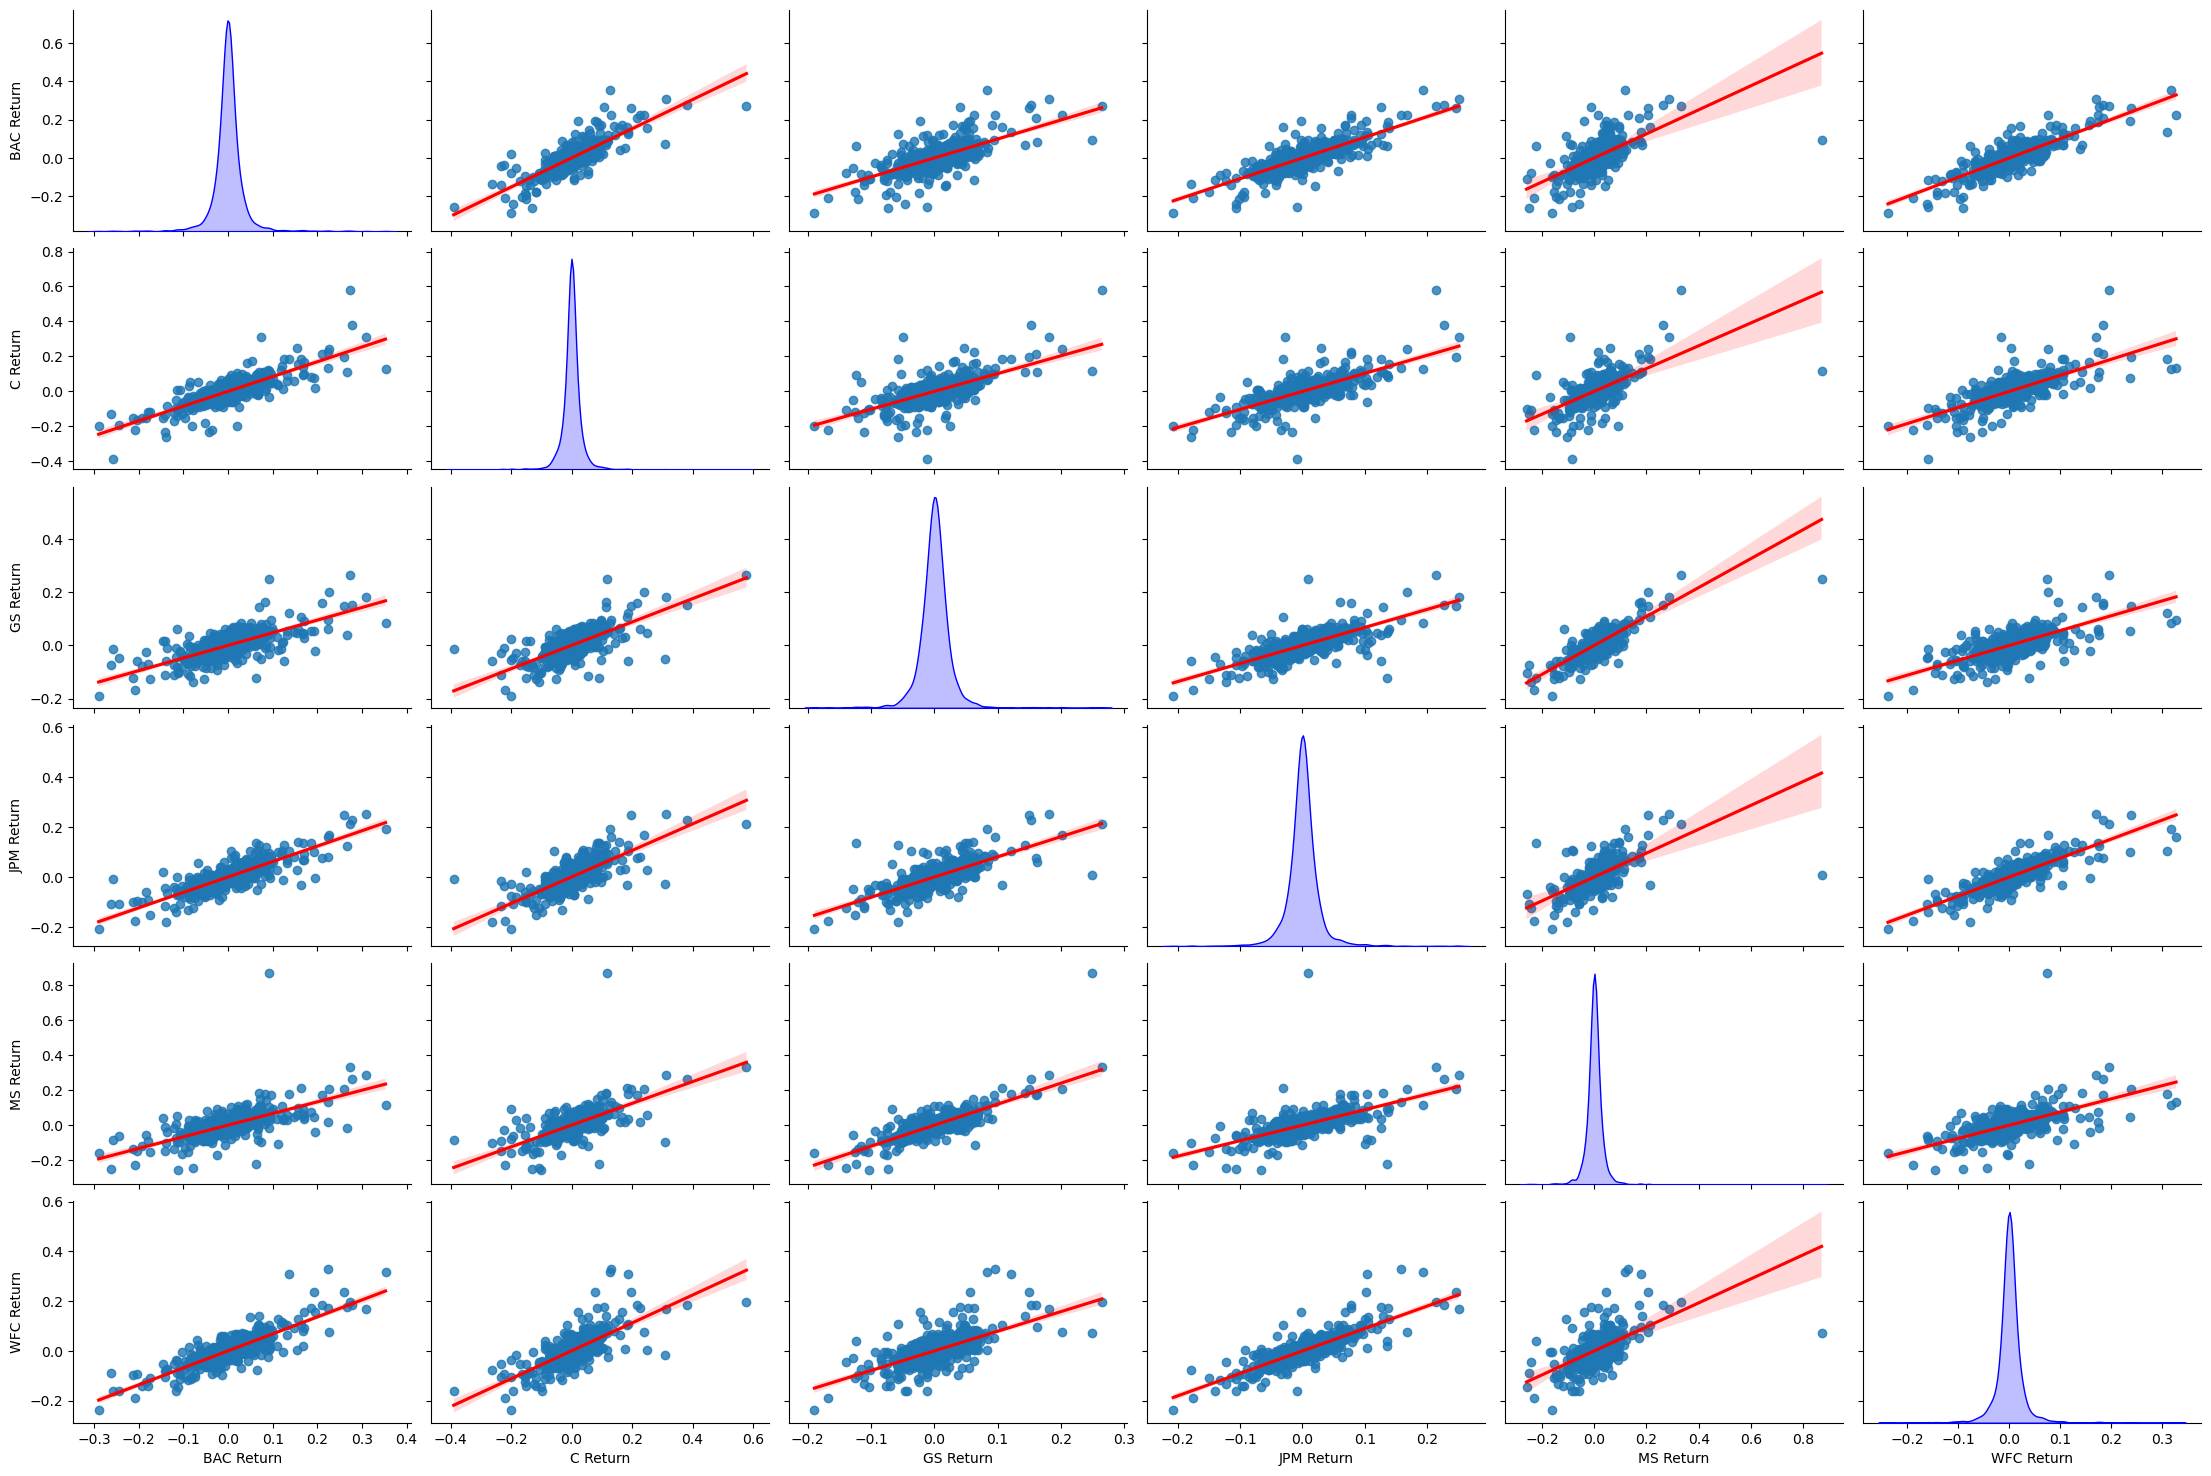

In [12]:
#Create a pairplot using seaborn of the returns dataframe.
import seaborn as sns
sns.pairplot(returns, kind='reg', diag_kind='kde',
              plot_kws={'line_kws':{'color':'red'}}, 
              diag_kws={'color':'blue'}, markers='o', 
              palette='husl',
                height=2.5, aspect=1.5, dropna=True)

#pairplots show suspicion for Morgan Stanley and CitiGroup

<Axes: title={'center': 'Mean Returns of Each Stock'}>

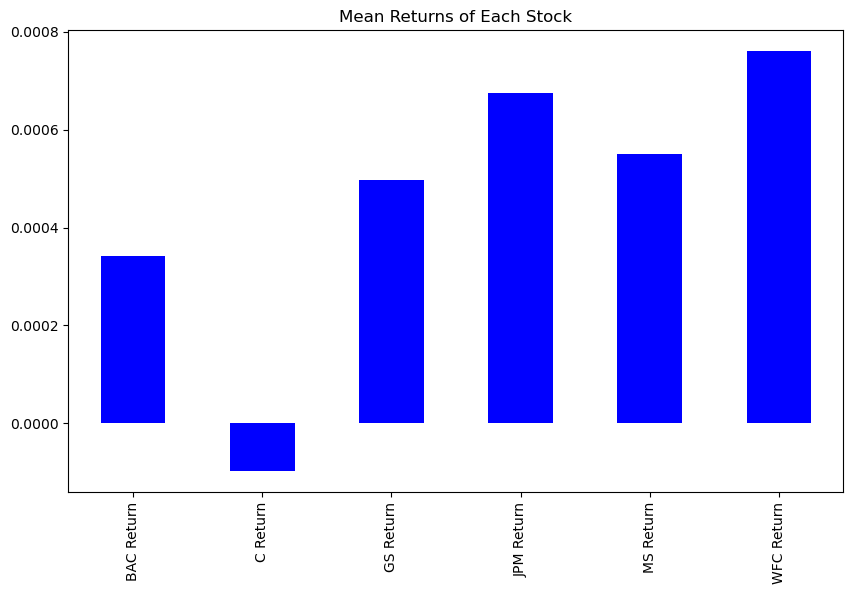

In [13]:
#plotting mean returns of each stock
mean_returns = returns.mean()
mean_returns.plot(kind='bar', figsize=(10, 6), 
                  title='Mean Returns of Each Stock', 
                  color='blue')

#Citi is showing a negative return, perhaps due to the financial crisis

During the first three weeks of November 2008, Citigroup's stock price dropped almost 80%, and its credit default swap spreads spiked as the market lost confidence in the bank's ability to honor its commitments. Counterparties pulled away, and regulators determined Citi's failure would constitute a systemic risk.

In [69]:
#Finding dates for the worst drop for each stock
worst_drop = returns.idxmin().sort_values()

print('Worst drop for each stock:')
print(worst_drop)

# BAC,GS and JPM and WFC all have their worst drop on 
# the same day
# MS and C are the wierdos here.

Worst drop for each stock:
MS Return    2008-10-09
BAC Return   2009-01-20
GS Return    2009-01-20
JPM Return   2009-01-20
WFC Return   2009-01-20
C Return     2009-02-27
dtype: datetime64[ns]


Wall Street shares plunge on Obama's inauguration day that is 20 January 2009
https://www.theguardian.com/business/2009/jan/20/stock-market-drop-obama-inauguration

In [68]:
#Finding dates for the best single day return for each stock
best_day = returns.idxmax().sort_values()
print('Best Day for each stock:')
print(best_day)


Best Day for each stock:
WFC Return   2008-07-16
MS Return    2008-10-13
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
BAC Return   2009-04-09
dtype: datetime64[ns]


In [60]:
best_day_C = best_day['C Return']
worst_day_C = worst_drop['C Return']
print('Difference between best and worst day for CitiGroup: ',
      (worst_day_C - best_day_C).days)

Difference between best and worst day for CitiGroup:  95


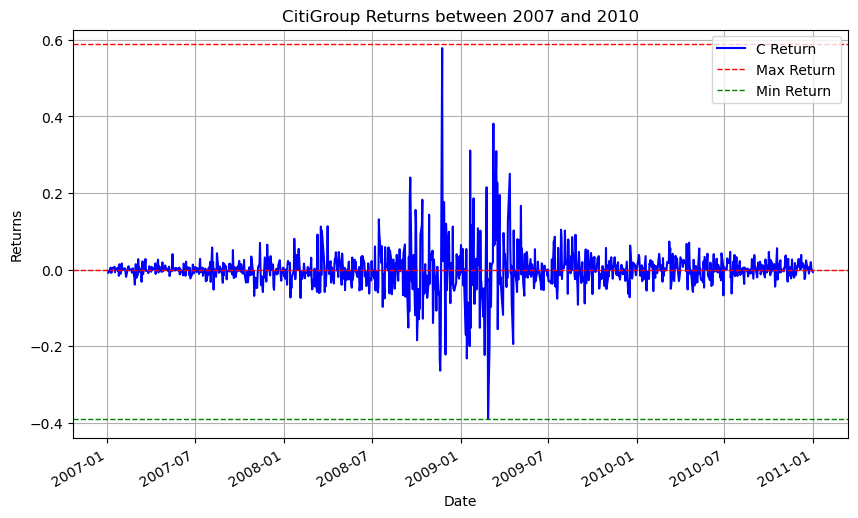

In [61]:
#plotting returns of CitiGroup between 2007 and 2010
returns['C Return'].loc['2007':'2010'].plot(
    figsize=(10, 6), title='CitiGroup Returns between 2007 and 2010',
    color='blue')
plt.ylabel('Returns')
plt.xlabel('Date')
plt.axhline(0.59, color='red', linestyle='--', linewidth=1, label='Max Return')
plt.axhline(-0.39, color='green', linestyle='--', linewidth=1, label='Min Return')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)

plt.show()


/var/folders/qx/bz1vynbj5_g5cg431gd5_s7h0000gn/T/ipykernel_28378/3753910200.py:11: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([best_day_C, worst_day_C], [0.59, -0.39], 'o-', color='black',linestyle='-', linewidth=1)


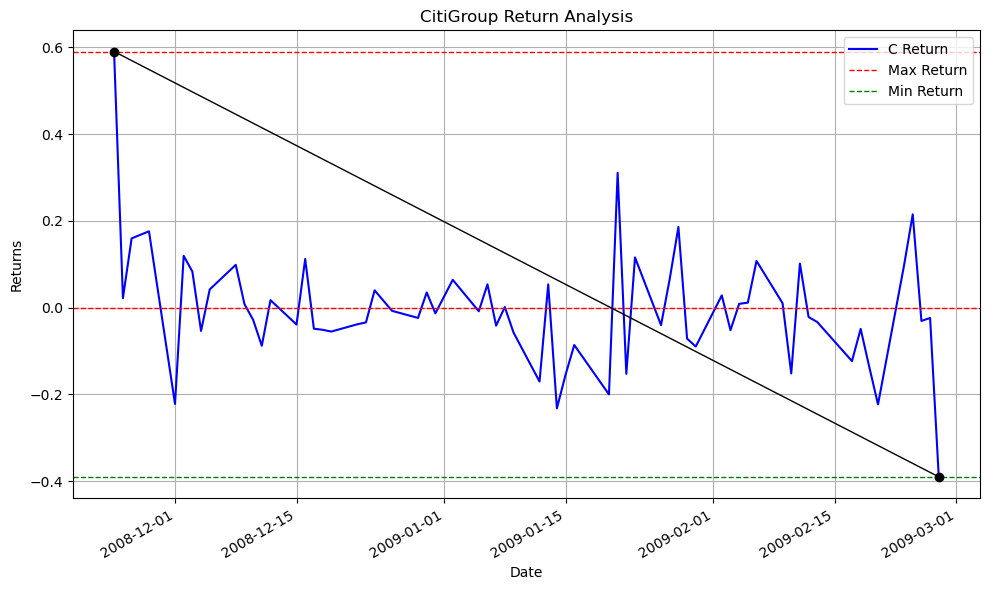

In [ ]:
#Plotting the returns of C between its best and worst day
returns['C Return'].loc[best_day_C:worst_day_C].plot(
    figsize=(10, 6), title='CitiGroup Returns between Best and Worst Day',
    color='blue')
plt.ylabel('Returns')
plt.xlabel('Date')
plt.axhline(0.59, color='red', linestyle='--', linewidth=1, label='Max Return')
plt.axhline(-0.39, color='green', linestyle='--', linewidth=1, label='Min Return')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
#Plotting a line between coordinates of worst and best day returns
plt.plot([best_day_C, worst_day_C], [0.59, -0.39], 'o-', color='black',linestyle='-', linewidth=1)

plt.title('CitiGroup Return Analysis')
plt.ylabel('Returns')
plt.xlabel('Date')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

#Graph shows that the stock price of CitiGroup dropped significantly


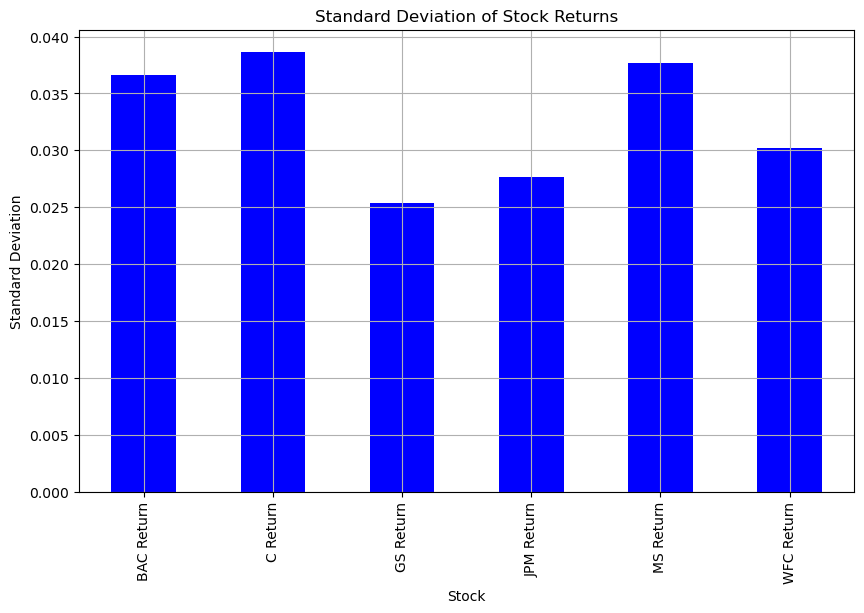

In [ ]:
#Find which stock had the highest standard deviation
std_dev = returns.std()
std_dev.plot(kind='bar', figsize=(10, 6),
             title='Standard Deviation of Returns of Each Stock',
             color='blue')
plt.ylabel('Standard Deviation')
plt.xlabel('Stock')
plt.grid(True)
plt.title('Standard Deviation of Stock Returns')
plt.show()

#Highest standard deviation is for CitiGroup making 
# it riskiest, second is Morgan Stanley

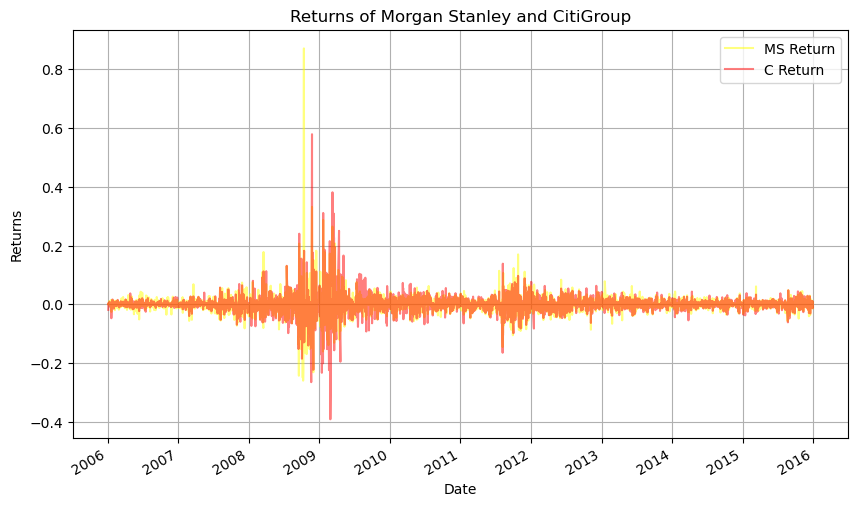

In [ ]:
#Lets plot the returns of Morgan Stanley and CitiGroup
returns[['MS Return', 'C Return']].plot(
    figsize=(10, 6), title='Returns of Morgan Stanley and CitiGroup',
    color=['yellow', 'red'], alpha=0.5)
plt.ylabel('Returns')
plt.xlabel('Date')
plt.grid(True)
plt.title('Returns of Morgan Stanley and CitiGroup')
plt.show()
#MS and C are the riskiest stocks

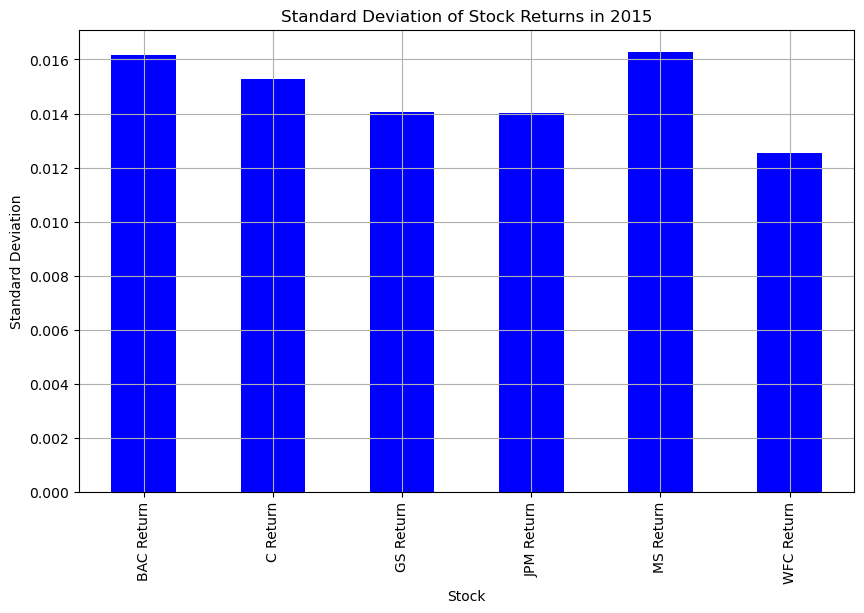

In [ ]:
#for 2015 the standard deviation of each stock
std_dev_2015 = returns.loc['2015'].std()
std_dev_2015.plot(kind='bar', figsize=(10, 6),
                  title='Standard Deviation of Returns of Each Stock in 2015',
                  color='blue')
plt.ylabel('Standard Deviation')
plt.xlabel('Stock')
plt.grid(True)
plt.title('Standard Deviation of Stock Returns in 2015')
plt.show()
#Here BAC is the riskiest stock and MS is not very far 
# behind in terms of risk

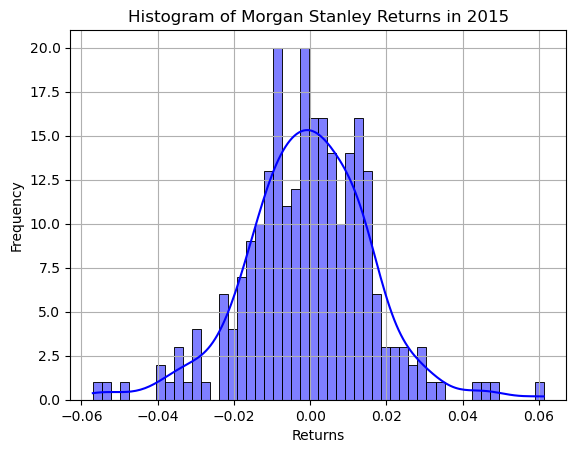

In [ ]:
#creating a histplot of 2015 returns of Morgan Stanley
sns.histplot(returns.loc['2015','MS Return'], bins=50, color='blue', kde=True)
plt.title('Histogram of Morgan Stanley Returns in 2015')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#It shows that the returns are normally distributed
#very few outliers

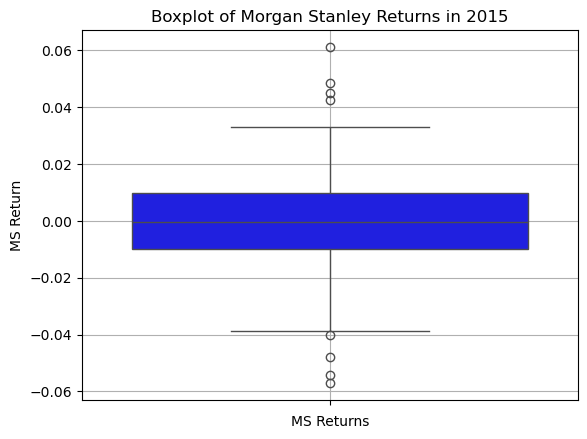

In [ ]:
#Lets confirm this by plotting a boxplot
sns.boxplot(returns.loc['2015','MS Return'], color='blue')
plt.title('Boxplot of Morgan Stanley Returns in 2015')
plt.xlabel('MS Returns')
plt.grid(True)
plt.show()
#Data is symmetric with few outliers in 2015 for MS

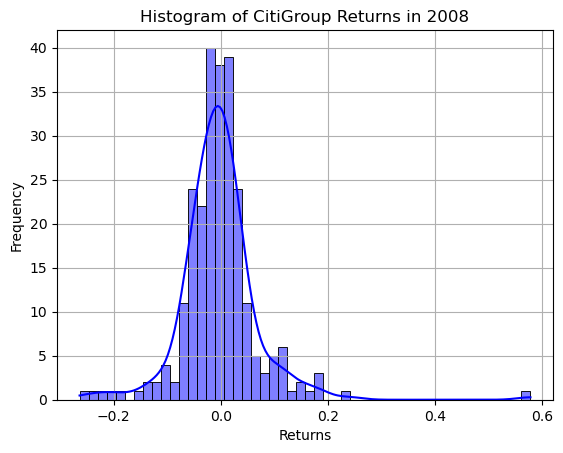

In [ ]:
#Creating histplot of 2008 returns of CitiGroup
sns.histplot(returns.loc['2008','C Return'], bins=50, color='blue', kde=True)
plt.title('Histogram of CitiGroup Returns in 2008')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#Data is skewed

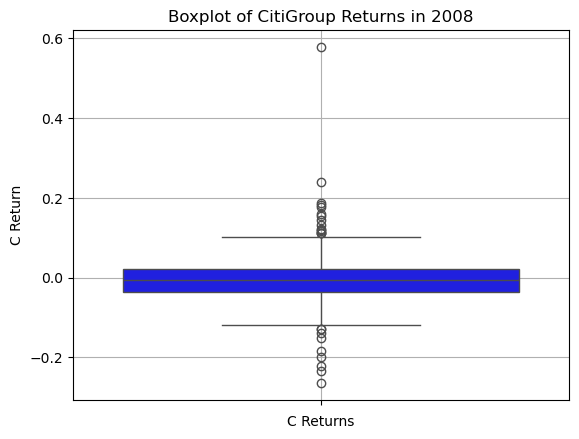

In [ ]:
#Lets confirm this by plotting a boxplot
sns.boxplot(returns.loc['2008','C Return'], color='blue')
plt.title('Boxplot of CitiGroup Returns in 2008')
plt.xlabel('C Returns')
plt.grid(True)
plt.show()
#Data is skewed with many outliers in 2008 for C, 
# obviously due to the financial crisis

More Visualization

In [49]:
#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

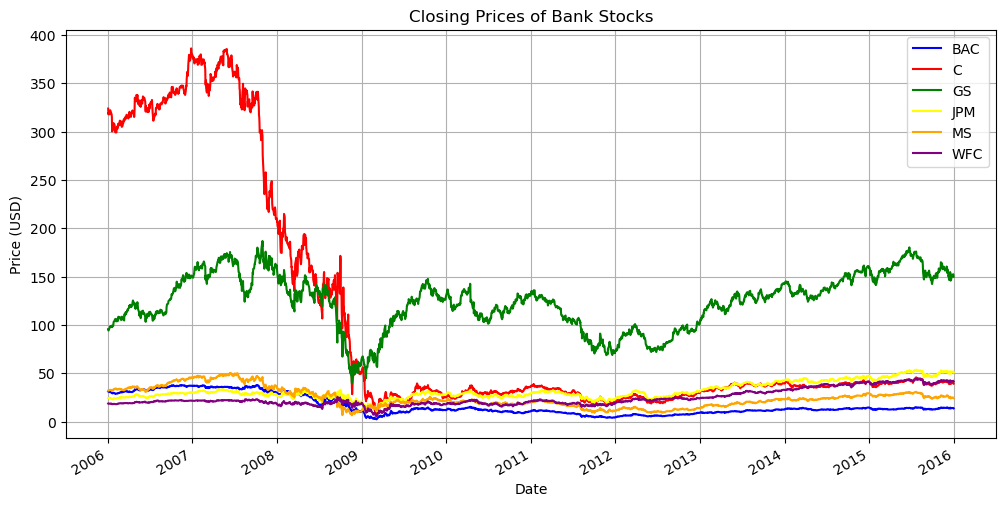

In [ ]:
bank_stocks.Close.plot(figsize=(12, 6), title='Closing Prices of Bank Stocks',
                       color=['blue', 'red', 'green', 'yellow', 'orange', 'purple'], label = tickers)
plt.title('Closing Prices of Bank Stocks')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Crazy drop in stock prices in 2008, especially for CitiGroup!
# This observed decline can help understand the market dynamics during financial crises.
# Stock prices of all banks have recovered since then.

In [59]:
#Lets do the plotting using plotly
import plotly.express as px
import cufflinks as cf
cf.go_offline()

In [32]:
import plotly.graph_objs as go
import cufflinks as cf

# Assuming bank_stocks is a DataFrame
bank_stocks.Close.iplot(
    layout=dict(
        xaxis=dict(
            title=dict(
                text='Date',
                font=dict(
                    size=18,
                    color='black'
                )
            )
        ),
        yaxis=dict(
            title=dict(
                text='Closing Price (USD)',
                font=dict(
                    size=18,
                    color='black'
                )
            )
        )
    ),
    title='Bank Stocks Closing Prices Over Time'
    
)

Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

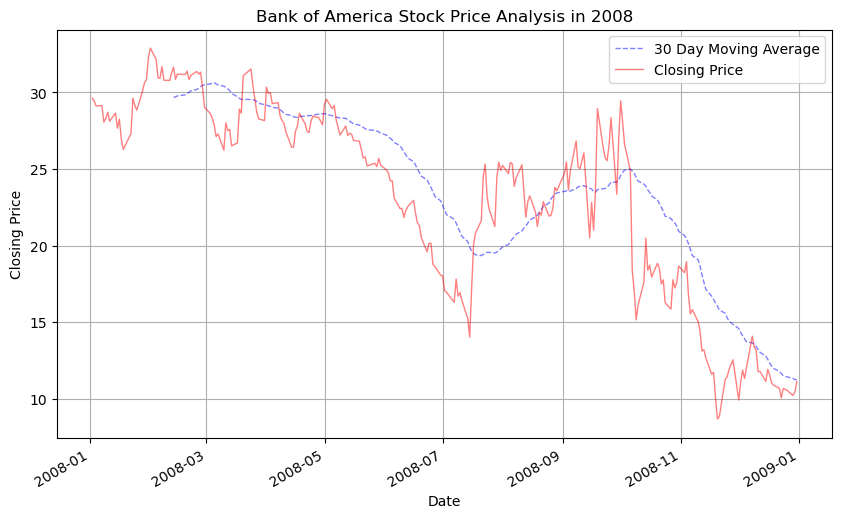

In [ ]:
#30 day moving average for Bank of America for the year 2008
bank_stocks.Close['BAC']['2008'].rolling(window=30).mean().plot(
    figsize=(10, 6),
    title='30 Day Moving Average for Bank of America in 2008',
    color='blue', label='30 Day Moving Average', 
    linewidth=1, linestyle='--', alpha=0.5)
bank_stocks.Close['BAC']['2008'].plot(
    figsize=(10, 6),
    color='red', label='Closing Price', linewidth=1, alpha=0.5)
plt.ylabel('Closing Price')
plt.xlabel('Date')  
plt.legend()
plt.grid(True)
plt.title('Bank of America Stock Price Analysis in 2008')
plt.show()

#Tracking the general trend of the stock price of Bank of America in 2008


Create a heatmap of the correlation between the stocks Close Price

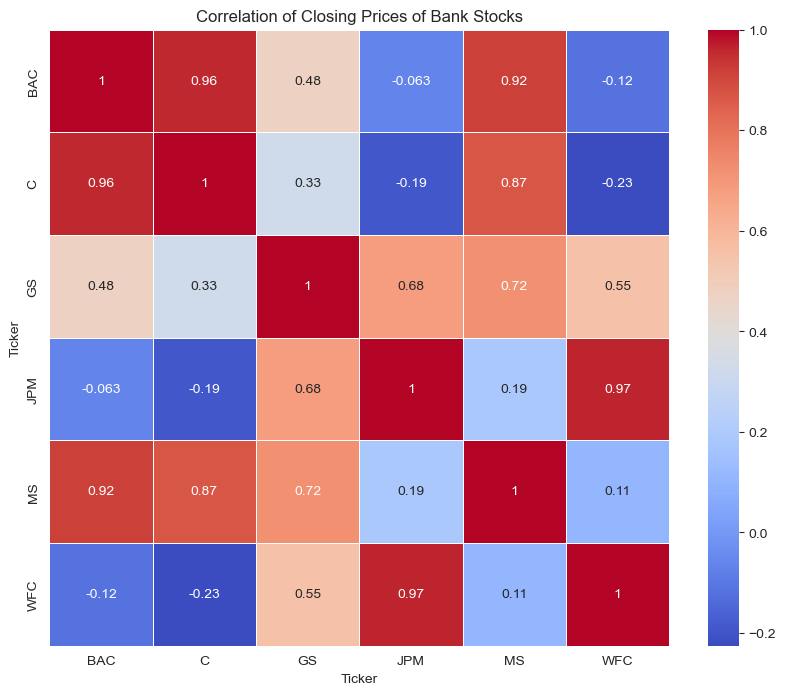

In [ ]:
stocks_close_price = bank_stocks['Close']
stocks_close_price_corr = stocks_close_price.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(stocks_close_price_corr, annot=True, cmap='coolwarm', 
            linewidths=0.5)
plt.title('Correlation of Closing Prices of Bank Stocks')
plt.show()
#Observations:
# Correlation between stocks is very high,
# this is expected as they are all in the same sector and
# are affected by the same market dynamics
# There seems to be multicollinearity between the stocks


Observations:
* Correlation between stocks is very high,this is expected as they are all in the same sector and are affected by the same market dynamics
* There seems to be multicollinearity between the stocks

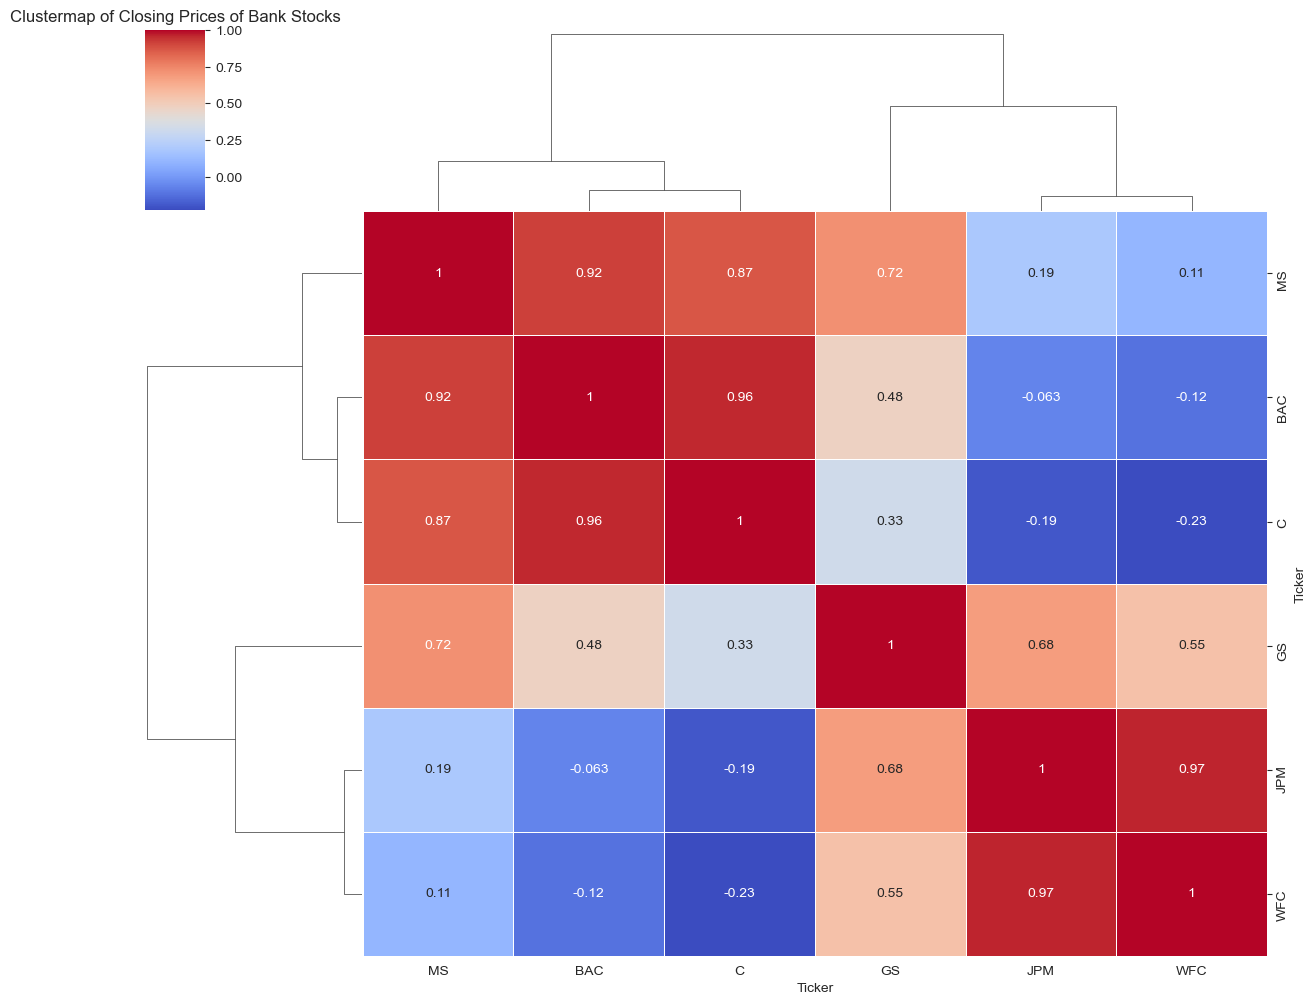

In [58]:
# Creating a clustermap using seaborn
sns.clustermap(stocks_close_price_corr, cmap='coolwarm', linewidths=0.5, 
               figsize=(12,10), annot=True)
plt.title('Clustermap of Closing Prices of Bank Stocks')
plt.show()

The analysis has been completed. Too many graphs and plottings. A good learning indeed.